<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/GM_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**

Exploratory analisys of Mobility dataset 2011-2016 (v1)

https://migrationpolicycentre.eu/global-mobilities/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/gm_argentina.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   source_name  target_name source_iso3 target_iso3  year  estimated_trips  \
0  Afghanistan       Rwanda         AFG         RWA  2014             29.0   
1  Afghanistan  Netherlands         AFG         NLD  2014           6991.0   
2  Afghanistan        Congo         AFG         COG  2011              0.0   
3  Afghanistan      Hungary         AFG         HUN  2012            308.0   
4  Afghanistan   Cabo Verde         AFG         CPV  2012              0.0   

       dist source_region target_region source_subregion    target_subregion  
0  5755.222          Asia        Africa    Southern Asia  Sub-Saharan Africa  
1  5361.400          Asia        Europe    Southern Asia      Western Europe  
2  7100.583          Asia        Africa    Southern Asia  Sub-Saharan Africa  
3  4367.694          Asia        Europe    Southern Asia      Eastern Europe  
4  9324.580          Asia        Africa    Southern Asia  Sub-Saharan Africa  


In [4]:
# Filter of countries of interest
countries = ['ARG', 'CHL', 'BOL', 'VEN']
latam_df = df[(df['source_iso3'].isin(countries)) & (df['target_iso3'].isin(countries))]
print(latam_df.head())

     source_name                         target_name source_iso3 target_iso3  \
7038   Argentina                               Chile         ARG         CHL   
7044   Argentina  Venezuela (Bolivarian Republic of)         ARG         VEN   
7091   Argentina                               Chile         ARG         CHL   
7155   Argentina  Venezuela (Bolivarian Republic of)         ARG         VEN   
7229   Argentina                               Chile         ARG         CHL   

      year  estimated_trips      dist source_region target_region  \
7038  2012        2511491.0  1128.317      Americas      Americas   
7044  2013         144393.0  5114.314      Americas      Americas   
7091  2015        3089193.0  1128.317      Americas      Americas   
7155  2015         123008.0  5114.314      Americas      Americas   
7229  2013        2383793.0  1128.317      Americas      Americas   

                     source_subregion                 target_subregion  
7038  Latin America and the Car

## Trips to Argentina

In [8]:


# Filtrar los datos para obtener solo los viajes desde CHL, BOL y VEN hacia ARG
filtered_data_arg = latam_df[(latam_df['target_iso3'] == 'ARG') & (latam_df['source_iso3'].isin(['CHL', 'BOL', 'VEN']))]

# Pivotar los datos para obtener las columnas con los países como series
pivot_data = filtered_data_arg.pivot_table(index='year', columns='source_iso3', values='estimated_trips', aggfunc='sum').fillna(0)


pivot_data

source_iso3,BOL,CHL,VEN
year,,,
2011,359026.0,2220104.0,132276.0
2012,406932.0,2511491.0,128219.0
2013,465051.0,2383793.0,145729.0
2014,576578.0,2441845.0,138234.0
2015,613185.0,3089193.0,125041.0
2016,668119.0,3949188.0,83783.0


In [10]:
# prompt: pivot_data divide by 100.000

pivot_data = pivot_data / 100000.0

pivot_data

source_iso3,BOL,CHL,VEN
year,,,
2011,3.59026,22.20104,1.32276
2012,4.06932,25.11491,1.28219
2013,4.65051,23.83793,1.45729
2014,5.76578,24.41845,1.38234
2015,6.13185,30.89193,1.25041
2016,6.68119,39.49188,0.83783


In [11]:
pivot_data.values.max()

39.49188

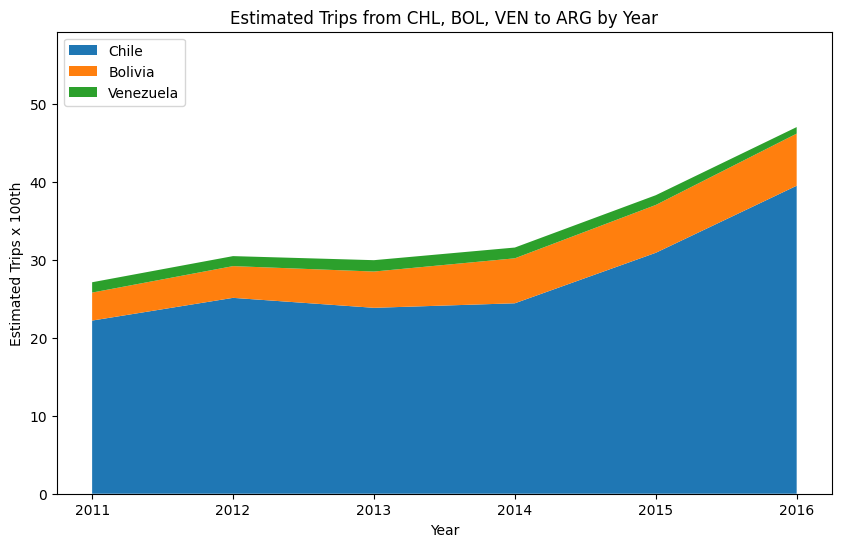

In [14]:
# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_data.index, pivot_data['CHL'], pivot_data['BOL'], pivot_data['VEN'],
              labels=['Chile', 'Bolivia', 'Venezuela'], colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajustar el eje Y
plt.ylim(0, pivot_data.values.max() * 1.5)  # Ajustar el límite superior un 10% por encima del valor máximo


plt.title('Estimated Trips from CHL, BOL, VEN to ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100th')
plt.legend(loc='upper left')
plt.show()

## Trips to Argentina and Chile

In [23]:
# agrego a latam_df  una variable estimated_by_hundred_m que divida estimated_trips por 100000

latam_df['estimated_by_hundred_m'] = latam_df['estimated_trips'] / 100000


<ipython-input-23-74a5a7ec303d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latam_df['estimated_by_hundred_m'] = latam_df['estimated_trips'] / 100000


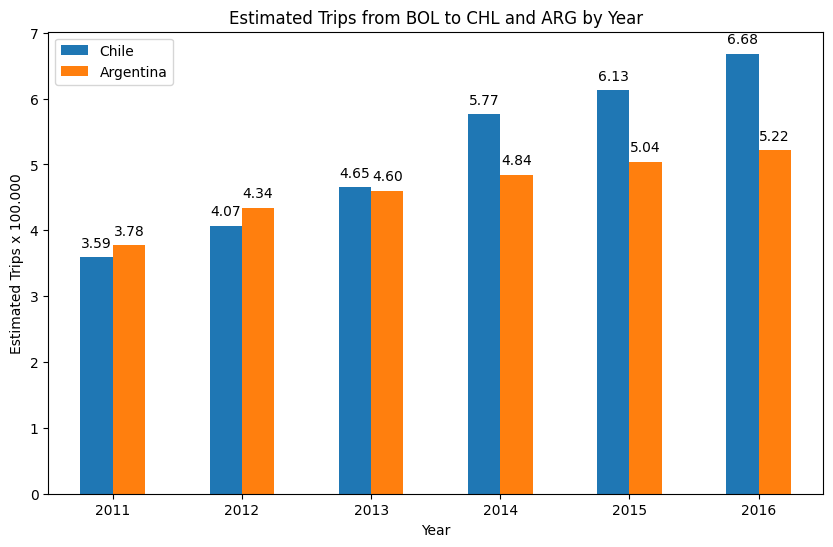

In [22]:

# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = latam_df[(latam_df['source_iso3'] == 'BOL') & (latam_df['target_iso3'].isin(['CHL', 'ARG']))]

# Agrupar por año y país de destino, calculando la suma de estimated_by_hundred_m
trips_by_year = filtered_data_bol.groupby(['year', 'target_iso3'])['estimated_by_hundred_m'].sum().unstack()

# Crear el gráfico de barras
ax = trips_by_year.plot(kind='bar', figsize=(10, 6))

# Agregar el valor de estimated_by_hundred_m en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Estimated Trips from BOL to CHL and ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')
plt.xticks(rotation=0)  # Evitar que las etiquetas del eje x se superpongan
plt.legend(['Chile', 'Argentina'])
plt.show()

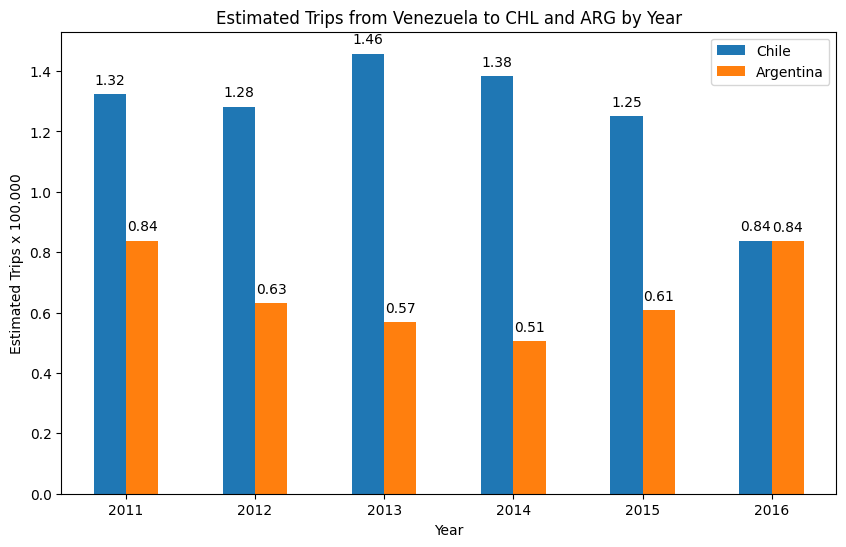

In [24]:

# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_ven = latam_df[(latam_df['source_iso3'] == 'VEN') & (latam_df['target_iso3'].isin(['CHL', 'ARG']))]

# Agrupar por año y país de destino, calculando la suma de estimated_by_hundred_m
trips_by_year = filtered_data_ven.groupby(['year', 'target_iso3'])['estimated_by_hundred_m'].sum().unstack()

# Crear el gráfico de barras
ax = trips_by_year.plot(kind='bar', figsize=(10, 6))

# Agregar el valor de estimated_by_hundred_m en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Estimated Trips from Venezuela to CHL and ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')
plt.xticks(rotation=0)  # Evitar que las etiquetas del eje x se superpongan
plt.legend(['Chile', 'Argentina'])
plt.show()

## Migration data

from:

https://riks.cris.unu.edu/annual-bilateral-migration-data


In [25]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [28]:
countries = ['ARG', 'CHL', 'BOL', 'VEN']
latam_mig_df = df2[(df2['iso_or'].isin(countries)) & (df2['iso_des'].isin(countries))]
print(latam_mig_df.head())

       iso_or     origin iso_des destination  year  stock   flow  inflow  \
111792    ARG  Argentina     BOL     Bolivia  1960   4306    NaN     NaN   
111793    ARG  Argentina     BOL     Bolivia  1961   4835  627.0     NaN   
111794    ARG  Argentina     BOL     Bolivia  1962   5361  634.0     NaN   
111795    ARG  Argentina     BOL     Bolivia  1963   5895  651.0     NaN   
111796    ARG  Argentina     BOL     Bolivia  1964   6435  667.0     NaN   

        outflow  
111792      NaN  
111793      NaN  
111794      NaN  
111795      NaN  
111796      NaN  


In [29]:
latam_mig_df

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
111792,ARG,Argentina,BOL,Bolivia,1960,4306,NaN,NaN,NaN
111793,ARG,Argentina,BOL,Bolivia,1961,4835,627.0,NaN,NaN
111794,ARG,Argentina,BOL,Bolivia,1962,5361,634.0,NaN,NaN
111795,ARG,Argentina,BOL,Bolivia,1963,5895,651.0,NaN,NaN
111796,ARG,Argentina,BOL,Bolivia,1964,6435,667.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2788449,VEN,Venezuela,CHL,Chile,2016,133624,79073.0,NaN,NaN
2788450,VEN,Venezuela,CHL,Chile,2017,228366,95573.0,NaN,NaN
2788451,VEN,Venezuela,CHL,Chile,2018,332512,105587.0,NaN,NaN
2788452,VEN,Venezuela,CHL,Chile,2019,433262,102880.0,NaN,NaN


### Stock of migrants born in VEN, CHL BOL and living Argentina

In [31]:
# prompt: filtrar latam_mig_df para iso_des ARG

# Filter latam_mig_df for iso_des ARG
arg_mig_df = latam_mig_df[latam_mig_df['iso_des'] == 'ARG']
arg_mig_df.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
332920,BOL,Bolivia,ARG,Argentina,1960,93271,NaN,NaN,9145.0
332921,BOL,Bolivia,ARG,Argentina,1961,93772,1315.0,14609.0,13294.0
332922,BOL,Bolivia,ARG,Argentina,1962,92958,9.0,15025.0,15016.0
332923,BOL,Bolivia,ARG,Argentina,1963,91235,-902.0,15555.0,16457.0
332924,BOL,Bolivia,ARG,Argentina,1964,93882,3457.0,15677.0,12220.0


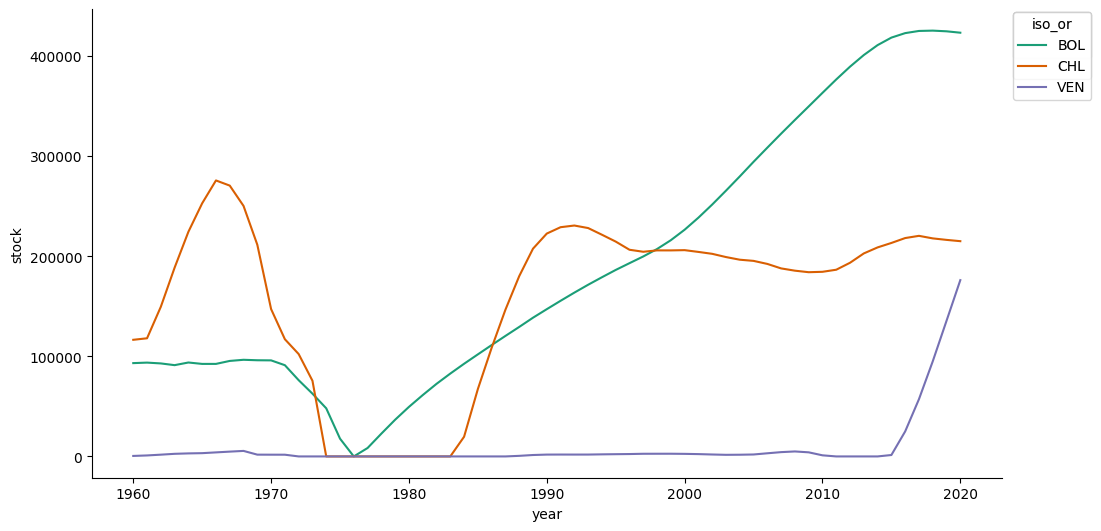

In [32]:
# @title year vs stock (Migrants in Argentina)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['stock']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = arg_mig_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('iso_or')):
  _plot_series(series, series_name, i)
  fig.legend(title='iso_or', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('stock')

### Stock of migrants born in VEN, ARG BOL and living Chile

In [34]:
# Filter latam_mig_df for iso_des CHL
chl_mig_df = latam_mig_df[latam_mig_df['iso_des'] == 'CHL']
chl_mig_df.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
112567,ARG,Argentina,CHL,Chile,1960,12054,NaN,NaN,NaN
112568,ARG,Argentina,CHL,Chile,1961,12224,302.0,NaN,NaN
112569,ARG,Argentina,CHL,Chile,1962,12313,219.0,NaN,NaN
112570,ARG,Argentina,CHL,Chile,1963,12475,290.0,NaN,NaN
112571,ARG,Argentina,CHL,Chile,1964,12701,352.0,NaN,NaN


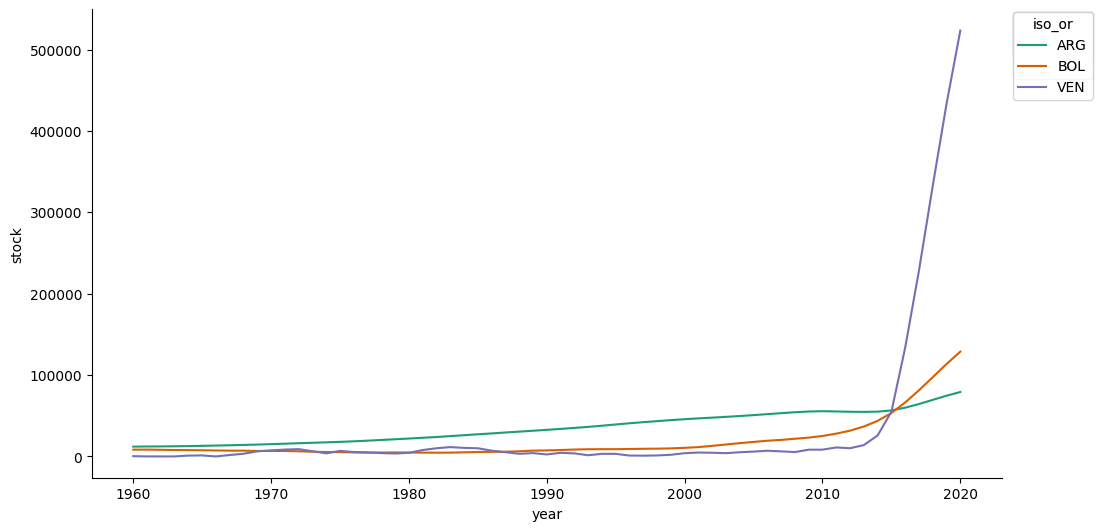

In [35]:
# @title year vs stock (Migrants in Chile)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['stock']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chl_mig_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('iso_or')):
  _plot_series(series, series_name, i)
  fig.legend(title='iso_or', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('stock')

In [36]:
# Filter latam_mig_df for years 2011 to 2016
latam_mig_2016 = latam_mig_df[(latam_mig_df['year'] >= 2011) & (latam_mig_df['year'] <= 2016)]
latam_mig_2016


,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
111843,ARG,Argentina,BOL,Bolivia,2011,37788,1377.0,NaN,NaN
111844,ARG,Argentina,BOL,Bolivia,2012,38995,1473.0,NaN,NaN
111845,ARG,Argentina,BOL,Bolivia,2013,40246,1523.0,NaN,NaN
111846,ARG,Argentina,BOL,Bolivia,2014,41495,1527.0,NaN,NaN
111847,ARG,Argentina,BOL,Bolivia,2015,42696,1485.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2788445,VEN,Venezuela,CHL,Chile,2012,10070,-906.0,NaN,NaN
2788446,VEN,Venezuela,CHL,Chile,2013,13951,3940.0,NaN,NaN
2788447,VEN,Venezuela,CHL,Chile,2014,25772,11904.0,NaN,NaN
2788448,VEN,Venezuela,CHL,Chile,2015,54887,29271.0,NaN,NaN


In [37]:
latam_df

,source_name,target_name,source_iso3,target_iso3,year,estimated_trips,dist,source_region,target_region,source_subregion,target_subregion,estimated_by_hundred_m
7038,Argentina,Chile,ARG,CHL,2012,2511491.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,25.11491
7044,Argentina,Venezuela (Bolivarian Republic of),ARG,VEN,2013,144393.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.44393
7091,Argentina,Chile,ARG,CHL,2015,3089193.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,30.89193
7155,Argentina,Venezuela (Bolivarian Republic of),ARG,VEN,2015,123008.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.23008
7229,Argentina,Chile,ARG,CHL,2013,2383793.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,23.83793
...,...,...,...,...,...,...,...,...,...,...,...,...
223382,Venezuela (Bolivarian Republic of),Argentina,VEN,ARG,2015,125041.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.25041
223395,Venezuela (Bolivarian Republic of),Argentina,VEN,ARG,2013,145729.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.45729
223419,Venezuela (Bolivarian Republic of),Chile,VEN,CHL,2014,50523.0,4922.363,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,0.50523
223456,Venezuela (Bolivarian Republic of),Bolivia (Plurinational State of),VEN,BOL,2014,10676.0,3017.410,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,0.10676


In [38]:
mob_and_mig = pd.merge(latam_df, latam_mig_2016,  how='inner', left_on=['year', 'target_iso3', 'source_iso3'], right_on=['year', 'iso_des', 'iso_or'])

In [39]:
mob_and_mig

,source_name,target_name,source_iso3,target_iso3,year,estimated_trips,dist,source_region,target_region,source_subregion,target_subregion,estimated_by_hundred_m,iso_or,origin,iso_des,destination,stock,flow,inflow,outflow
0,Argentina,Chile,ARG,CHL,2012,2511491.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,25.11491,ARG,Argentina,CHL,Chile,54901,-42.0,NaN,NaN
1,Argentina,Venezuela (Bolivarian Republic of),ARG,VEN,2013,144393.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.44393,ARG,Argentina,VEN,Venezuela,9862,149.0,NaN,NaN
2,Argentina,Chile,ARG,CHL,2015,3089193.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,30.89193,ARG,Argentina,CHL,Chile,56516,1798.0,NaN,NaN
3,Argentina,Venezuela (Bolivarian Republic of),ARG,VEN,2015,123008.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.23008,ARG,Argentina,VEN,Venezuela,9944,91.0,NaN,NaN
4,Argentina,Chile,ARG,CHL,2013,2383793.0,1128.317,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,23.83793,ARG,Argentina,CHL,Chile,54718,141.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Venezuela (Bolivarian Republic of),Argentina,VEN,ARG,2015,125041.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.25041,VEN,Venezuela,ARG,Argentina,1420,1420.0,1420.0,0.0
68,Venezuela (Bolivarian Republic of),Argentina,VEN,ARG,2013,145729.0,5114.314,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,1.45729,VEN,Venezuela,ARG,Argentina,0,0.0,0.0,0.0
69,Venezuela (Bolivarian Republic of),Chile,VEN,CHL,2014,50523.0,4922.363,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,0.50523,VEN,Venezuela,CHL,Chile,25772,11904.0,NaN,NaN
70,Venezuela (Bolivarian Republic of),Bolivia (Plurinational State of),VEN,BOL,2014,10676.0,3017.410,Americas,Americas,Latin America and the Caribbean,Latin America and the Caribbean,0.10676,VEN,Venezuela,BOL,Bolivia,447,96.0,NaN,NaN


In [44]:
# Filter data for source_iso3 'VEN' and target_iso2 'CHL' and 'ARG'
ven_df = mob_and_mig[(mob_and_mig['source_iso3'] == 'VEN') & (mob_and_mig['target_iso3'].isin(['CHL', 'ARG']))]


In [45]:
ven_df = ven_df[['source_iso3', 'target_iso3', 'year', 'estimated_trips', 'stock', 'flow']]
ven_df

,source_iso3,target_iso3,year,estimated_trips,stock,flow
54,VEN,CHL,2013,56746.0,13951,3940.0
56,VEN,CHL,2012,63198.0,10070,-906.0
57,VEN,ARG,2016,83783.0,24999,23590.0
58,VEN,CHL,2016,83651.0,133624,79073.0
59,VEN,CHL,2011,83841.0,11040,2762.0
60,VEN,ARG,2011,132276.0,0,-1100.0
61,VEN,CHL,2015,60878.0,54887,29271.0
64,VEN,ARG,2014,138234.0,0,0.0
65,VEN,ARG,2012,128219.0,0,0.0
67,VEN,ARG,2015,125041.0,1420,1420.0


In [48]:
ven_df.to_csv('ven_data.csv', index=False)